## Perceptron - different alfas

In [2]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [3]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar_no_teta, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 0.01025037, -0.02463577,  0.99746351,  0.96543093,  0.02670691],
        [ 0.01624748,  0.98531472, -0.0440375 ,  0.98700866, -0.01441238]]),
 array([[0, 0, 0, 1, 0]]))

In [4]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((2, 600), (2, 200), (1, 600), (1, 200))

In [5]:
x_range = np.arange(-2, 4)
experiments_numb = 10

In [6]:
perceptrons = []
tetas = list(np.linspace(-1, 2, num=100))
for teta in tetas:
    estimate_func = lambda v: unipolar(teta, v)
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, 0.0001, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

100

,θ,average epoch count
0,-1.000000,100.0
1,-0.969697,100.0
2,-0.939394,100.0
3,-0.909091,100.0
4,-0.878788,100.0
...,...,...
95,1.878788,100.0
96,1.909091,100.0
97,1.939394,100.0
98,1.969697,100.0


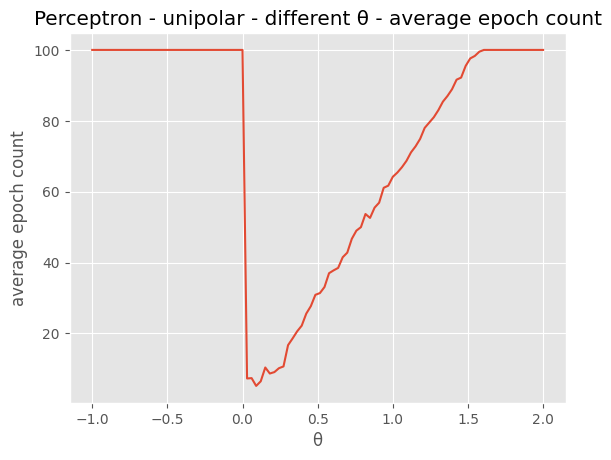

In [11]:
x, y = tetas, [v.average_epoch_count for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - unipolar - different θ - average epoch count")
plt.xlabel("θ")
plt.ylabel("average epoch count")
# plt.ylim(0, 105)
# plt.xlim(0, 0.25)
pd.DataFrame({"θ":x, "average epoch count":y})

,θ,average matching percent
0,-1.000000,0.0
1,-0.969697,0.0
2,-0.939394,0.0
3,-0.909091,0.0
4,-0.878788,0.0
...,...,...
95,1.878788,100.0
96,1.909091,100.0
97,1.939394,100.0
98,1.969697,100.0


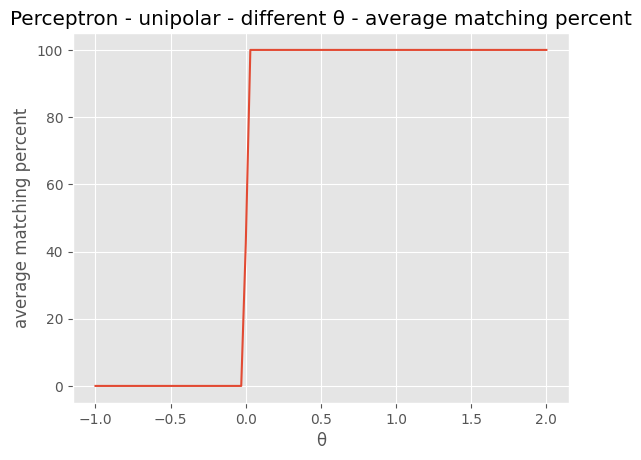

In [10]:
len(perceptrons)
x, y = tetas, [v.average_matching_percent for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - unipolar - different θ - average matching percent")
plt.xlabel("θ")
plt.ylabel("average matching percent")
# plt.ylim(0, 105)
# plt.xlim(0, 0.25)
pd.DataFrame({"θ": x, "average matching percent": y})